# Proyecto Modulo 1

dataset:
https://www.kaggle.com/airbnb/seattle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gmplot
import geopandas as gpd
import shapely
from shapely.geometry import *

import plotly

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

import plotly.express as px

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from scipy import stats
import scipy

import statsmodels.api as sm

from IPython.core.display import display, HTML
pd.options.plotting.backend = 'plotly'
%matplotlib inline

Se importa el dataset con el calendario de los airbnb's

In [2]:
calendario = pd.read_csv("calendar.csv")

Se importa el dataset del listado de airbnb's y sus caracteristicas

In [3]:
listado = pd.read_csv("listings.csv")

## Analisis primer dataset

Se observa las caracteristicas del dataset. El dataset es bastante grande (1393570 filas), pero se observa que por cada airbnb hay 365 filas.

In [4]:
calendario.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendario.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [6]:
calendario.shape

(1393570, 4)

In [7]:
len(calendario["date"].unique())

365

Para la columna "available", se cambian los valores de 't' y 'f' por 1 y 0. Tambien se añade una columna con el mes.

In [9]:
calendario["available"] = calendario["available"].replace("f", 0)
calendario["available"] = calendario["available"].replace("t", 1)
calendario["price"] = calendario["price"].str.replace("$","")
calendario["price"] = calendario["price"].str.replace(",","")
calendario["price"] = pd.to_numeric(calendario["price"])
calendario['month'] = pd.DatetimeIndex(calendario["date"]).month
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


Se agrupan los datos por fecha y se añade una columna con el día.

In [12]:
disponibilidad = calendario[["available", "date"]].groupby("date").sum()
disponibilidad["day"] = np.arange(0, 365)
disponibilidad

,available,day
date,,
2016-01-04,1735,0
2016-01-05,1867,1
2016-01-06,1826,2
2016-01-07,1776,3
2016-01-08,1782,4
...,...,...
2016-12-29,2835,360
2016-12-30,2840,361
2016-12-31,2859,362


Se agrupa la disponibilidad por mes.

In [13]:
disponibilidad_mes = calendario[["available", "month"]].groupby("month").sum()
disponibilidad_mes

,available
month,
1,64937
2,73321
3,83938
4,76037
5,79971
6,77244
7,74222
8,76347
9,77246


Se mira la media de precios a lo largo del año y el mes.

In [15]:
precios = calendario.dropna()
precios_dia = precios[["price", "date"]].groupby("date").mean()
precios_dia["day"] = np.arange(0, 365)
precios_dia

,price,day
date,,
2016-01-04,122.085879,0
2016-01-05,120.681307,1
2016-01-06,120.928258,2
2016-01-07,120.958896,3
2016-01-08,127.640853,4
...,...,...
2016-12-29,138.045503,360
2016-12-30,144.738380,361
2016-12-31,145.698146,362


In [16]:
precios_mes = precios[["price", "month"]].groupby("month").mean()
precios_mes

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Se realiza los plots del precio y disponibilidad a lo largo del año.

Text(0.5, 33.00000000000005, 'Mes')

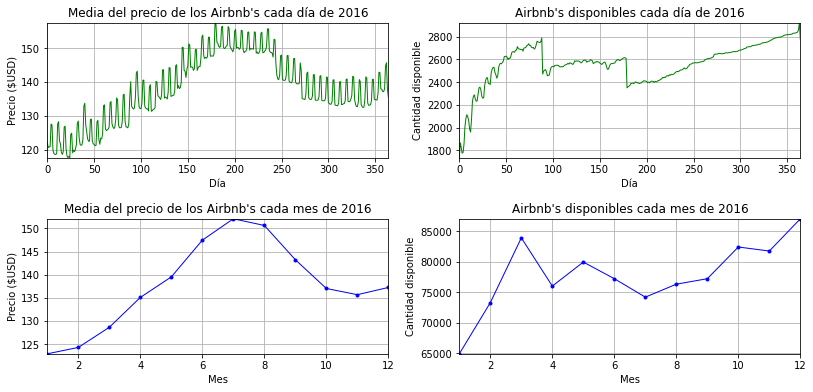

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)
axes[0][0].plot(precios_dia["day"], precios_dia["price"], 'g-',linewidth=1)
axes[0][0].grid()
axes[0][0].autoscale(axis='both', tight=True)
axes[0][0].set_title("Media del precio de los Airbnb's cada día de 2016")
axes[0][0].set_ylabel("Precio ($USD)")
axes[0][0].set_xlabel("Día")

axes[1][0].plot(precios_mes.index, precios_mes["price"], 'b.-',linewidth=1)
axes[1][0].grid()
axes[1][0].autoscale(axis='both', tight=True)
axes[1][0].set_title("Media del precio de los Airbnb's cada mes de 2016")
axes[1][0].set_ylabel("Precio ($USD)")
axes[1][0].set_xlabel("Mes")

axes[0][1].plot(disponibilidad["day"], disponibilidad["available"], 'g-',linewidth=1)
axes[0][1].grid()
axes[0][1].autoscale(axis='both', tight=True)
axes[0][1].set_title("Airbnb's disponibles cada día de 2016")
axes[0][1].set_ylabel("Cantidad disponible")
axes[0][1].set_xlabel("Día")

axes[1][1].plot(disponibilidad_mes.index, disponibilidad_mes["available"], 'b.-',linewidth=1)
axes[1][1].grid()
axes[1][1].autoscale(axis='both', tight=True)
axes[1][1].set_title("Airbnb's disponibles cada mes de 2016")
axes[1][1].set_ylabel("Cantidad disponible")
axes[1][1].set_xlabel("Mes")

Se evidencian picos en la media del precio, donde se supone que se debe a una subida en los precios los fines de semana. Para comprobarlos, se calcula la media del precio cada día de la semana.

In [15]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
precios_dia["day_week"] = pd.DatetimeIndex(precios_dia.index).dayofweek
precios_dia_semana = precios_dia[["price", "day_week"]].groupby("day_week", as_index=False).mean()
precios_dia_semana['day_week'] = precios_dia_semana['day_week'].replace([0, 1, 2, 3, 4, 5, 6], weekDays)
precios_dia_semana

,day_week,price
0,Lunes,135.637263
1,Martes,135.379666
2,Miercoles,135.407384
3,Jueves,136.382791
4,Viernes,142.964759
5,Sabado,143.120562
6,Domingo,136.463607


Text(0.5, 0, 'Día de la semana')

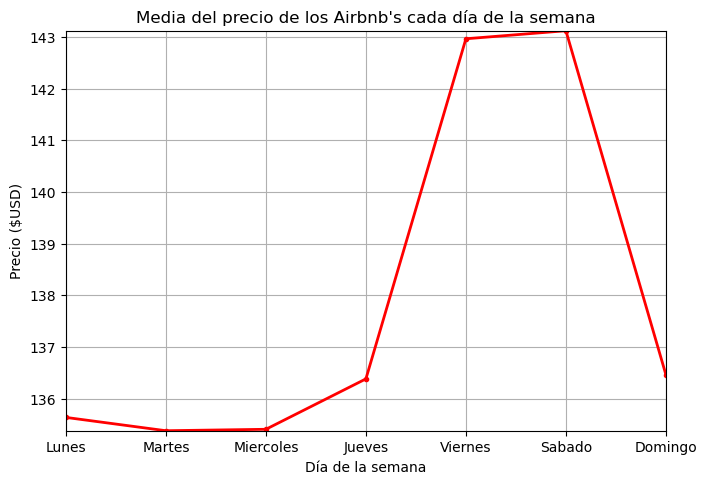

In [16]:
fig = plt.figure(dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.plot( precios_dia_semana["day_week"], precios_dia_semana["price"], 'r.-',linewidth=2)
axes.grid()
axes.autoscale(axis='both', tight=True)
axes.set_title("Media del precio de los Airbnb's cada día de la semana")
axes.set_ylabel("Precio ($USD)")
axes.set_xlabel("Día de la semana")

Finalmente se analiza la distribución de disponibilidad de los airbnb's con un histograma. Se observa que la mayoria no se ocupan casi ningun día del año

In [17]:
ocupacion = calendario[["available", "listing_id"]].groupby("listing_id").sum()
day = np.arange(0, 365)
ocupacion.reset_index(inplace=True)
ocupacion.rename(columns={"listing_id": "id"}, inplace = True)
ocupacion

,id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3813,10332096,365
3814,10334184,361
3815,10339144,0
3816,10339145,365


Text(0.5, 0, 'Días disponibles')

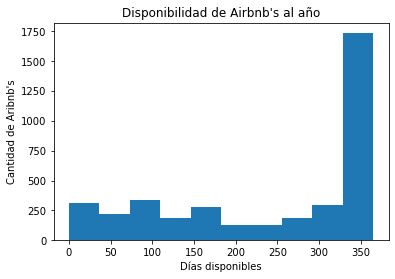

In [18]:
plt.hist(ocupacion["available"]);
plt.title("Disponibilidad de Airbnb's al año")
plt.ylabel("Cantidad de Aribnb's")
plt.xlabel("Días disponibles")

### Concluciones del calendario

1. Se observa que durante los meses de verano la demanda de airbnb's es mucho más alta, algo que es evidente. Sin embargo, se observa que durante la festividades de fin de año del 2016 la demanda minima, algo que no se esperaba pues los viajes son frecuentes en esta epoca.
2. De manera similar, el precio aumenta junto con la demanda, algo que es evidente. Pero tambien se observa que los días Viernes y Sabado se eleva el precio en aproximadamente 8 usd.
3. En el histograma de ocupación se observa que la mayoria de los airbnb's estan disponibles casi todo el año. Con el siguiente dataset se buscará la correlación entre las distintas variables con la disponibilidad del airbnb al año.

## Analisis del segundo dataset
Se observa las columnas del dataset para tener un conocimiento general del dataset.

In [19]:
listado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Se crea una copia del dataset y se eliminan las columnas innecesarias o redundantes. A continuación se explica cada una:
* "country" y "country_code" corresponden exclusivamente a Estados Unidos, no  es relevante esta información.
* "thumbnail_url","medium_url","picture_url","xl_picture_url","host_url" y "listing_url" son imagenes y urls que no son relevantes para el análisis.
* "license" es una columna de NaN.
* "jurisdiction_names" todos los valores son Washington
* "calendar_updated", "calendar_last_scraped", "last_scraped", "last_review" y "first_review" son fechas irrelevantes para el análisis.
* "has_availability" es la disponibilidad de los airbnb's del ultimo día, dado que se va a utilizar el dataset anterior que tiene más información, es irrelevante esta coluna.
* "notes", "transit", "neighbourhood_group_cleansed, "neighborhood_overview", "name", "summary", "space" y "description" son las descripciones del dueño del airbnb, al ser parrafos de texto, no se va a utilizar para el análisis.
* "city" y "state" son la ciudad y el estado de Seattle, es reduntante esta columna.
* "market" solo tiene la cadena Seattle, es innecesaria.
* "host_name", "host_location", "host_about", "host_response_time", "zipcode", "host_response_rate", "host_acceptance_rate", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_verifications", "host_has_profile_pic", "host_identity_verified", "host_since", "host_is_superhost", "calculated_host_listings_count", "require_guest_phone_verification", "require_guest_profile_picture" y "host_id" es información del host que es irrelevante.
* "street" es la calle donde esta el airbnb, para cada caso es diferente.
* "smart_location" hace referencia a Seattle, es redundante.
* "amenities" son  los servicios que presta cada airbnb. Ej: WiFI, aire acondicionado, etc. Cada fila tiene diferentes servicios y escritos de diferentes formas.
* "review_scores_rating", "review_scores_communication", "reviews_per_month", "instant_bookable" y "review_scores_value" no se tendra en cuenta para el análisis.
* "availability_60", "availability_90" y "availability_365" no se tendran en cuenta porque se tiene el anterior dataset.
* "requires_license" son todos falsos, es redundante.
* "weekly_price" y "monthly_price" no se utilizan porque se tiene el otro dataset.
* "square_feet" la mayoría son NaNs.
* "security_deposit" y "cleaning_fee" no es relevante.
* "experiences_offered" y "scrape_id" todos son NaN.
* "maximum_nights" es irrelevante para el análisis

In [47]:

listado_copia = listado.copy()
# Eliminamos variables redundantes o inecesarias del dataset
innecesario = ["country","country_code","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","listing_url",
               "license", "jurisdiction_names", "last_review","first_review","has_availability","description","last_scraped",
               "city","state","market","calendar_last_scraped","neighbourhood_cleansed","calendar_updated","space","summary",
               "name","neighborhood_overview","host_name","host_location","host_about","host_response_time","zipcode",
               "host_response_rate","host_acceptance_rate","host_thumbnail_url","host_picture_url","host_neighbourhood",
               "host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified",
               "street", "host_since", "host_is_superhost", "neighbourhood_group_cleansed", "smart_location","amenities",
               "calculated_host_listings_count","require_guest_phone_verification","require_guest_profile_picture","review_scores_communication",
               "review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","number_of_reviews","availability_30",
               "availability_60","availability_90","availability_365", "requires_license", "reviews_per_month","instant_bookable",
               "review_scores_value","weekly_price","monthly_price","transit","notes","square_feet","cleaning_fee",
               "security_deposit","experiences_offered","scrape_id","maximum_nights","review_scores_rating", "host_id"]
for i in range(len(innecesario)):
    listado_copia.pop(innecesario[i])

listado_copia = pd.merge(listado_copia,ocupacion,on='id')
listado_copia["price"] = listado_copia["price"].str.replace("$","")
listado_copia["price"] = listado_copia["price"].str.replace(",","")
listado_copia["price"] = pd.to_numeric(listado_copia["price"])
listado_copia.head()

,id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
0,241032,Queen Anne,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,$5.00,1,9.0,moderate,346
1,953595,Queen Anne,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,$0.00,2,10.0,strict,291
2,3308979,Queen Anne,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,$25.00,4,10.0,strict,220
3,7421966,Queen Anne,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,$0.00,1,NaN,flexible,143
4,278830,Queen Anne,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,$15.00,1,9.0,strict,365


Para el análisis de la locación de los airbnb's se toman los que tienen la posición exacta.

In [48]:
true_location = listado_copia[listado_copia["is_location_exact"]=="t"].dropna()

Se realiza y se grafica la matriz de correlación, se evidencia que ninguna variable tiene correlación con la disponibilidad.

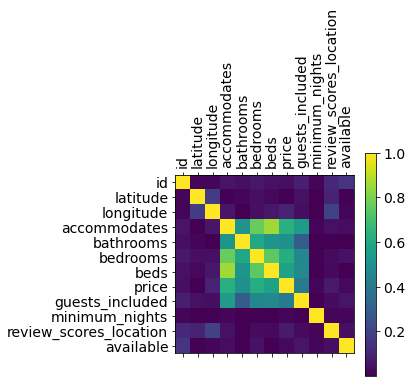

In [49]:
plt.matshow(abs(true_location.corr()))
plt.xticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Se observa la distribución de los datos, donde se observa que los puntos se agrupan al norte, centro, y sur de la ciudad

In [23]:
true_location.plot.scatter("longitude", "latitude", s=1, c="available")

A continuación se divide el dataset en Norte, Centro y Sur. Dado que se busca una locación que cumpla con que la mayoría del año este ocupado, se filtran las posiciones de acuerdo a que la disponibilidad sea menor al 20%, es decir, que este ocupado el 80% del año. Finalmente se vuelven a analizar las correlaciones.

In [52]:
min_dias=365*0.2

### Norte

In [51]:
norte = true_location[(true_location["latitude"]>47.65)]
norte.plot.scatter("longitude", "latitude", s=1, c="available")

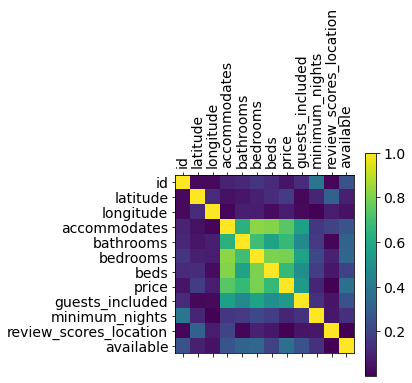

In [53]:
norte = norte[norte["available"]<=min_dias]
plt.matshow(abs(norte.corr()))
plt.xticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Para el Norte se observan que las correlaciones con la disponibilidad siguen siendo bajas

### Sur

In [54]:
sur = true_location[((true_location["latitude"]<47.60)&(true_location["longitude"]<-122.34))]
sur.plot.scatter("longitude", "latitude", s=1, c="available")

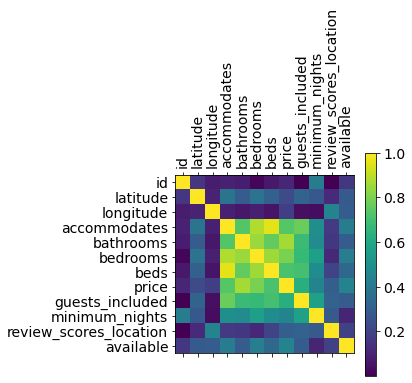

In [55]:
sur = sur[sur["available"]<=min_dias]
plt.matshow(abs(sur.corr()))
plt.xticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

En este caso se evidencia una correlación superior que en los demás análisis que posteriormente se estudiará.

### Centro

In [56]:
centro = true_location[(true_location["latitude"]>47.61)|(true_location["longitude"]>-122.34)]
centro = centro[(centro["latitude"]<47.65)]
centro.plot.scatter("longitude", "latitude", s=1, c="available")

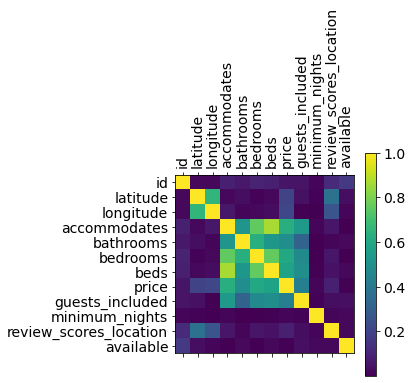

In [57]:
plt.matshow(abs(centro.corr()))
plt.xticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Se crea otro dataset donde la ocupación es de almenos del 80% del año.

In [58]:
ocupacion_minima = true_location[true_location["available"]<=min_dias]

Dado que se evidencio que las coordenadas no tienen correlación con la disponibilidad, se realizo un mapa con clusters para evidenciar las zonas donde es más probable tener una mayor ocupación.

In [60]:
seattle_coords = (47.608013, -122.335167)

In [61]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True)

destino_coords = ocupacion_minima[['latitude', 'longitude']].values

FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

Se observa en el mapa que la mayoria se agrupan en los barrios de Capitol Hill, First Hill y Belltown.

### Análisis de estructura

Con la información de la locación, se analiza el mejor tipo de estructura. Dado que se busca comprar y alquilar una propiedad entera, no se tendra en cuenta los cobertizos, los campers, cabinas, casas del arbol, etc.

In [65]:
ocupacion_minima = ocupacion_minima[(ocupacion_minima["property_type"]!="Loft")&
                                   (ocupacion_minima["property_type"]!="Bed & Breakfast")&
                                   (ocupacion_minima["property_type"]!="Treehouse")&
                                   (ocupacion_minima["property_type"]!="Camper/RV")&
                                   (ocupacion_minima["property_type"]!="Cabin")]

Se análisa la distribución de las estructuras en relación con la disponibilidad. Se evidencia que las casas y los apartamentos son más probables a tener una mayor ocupación.

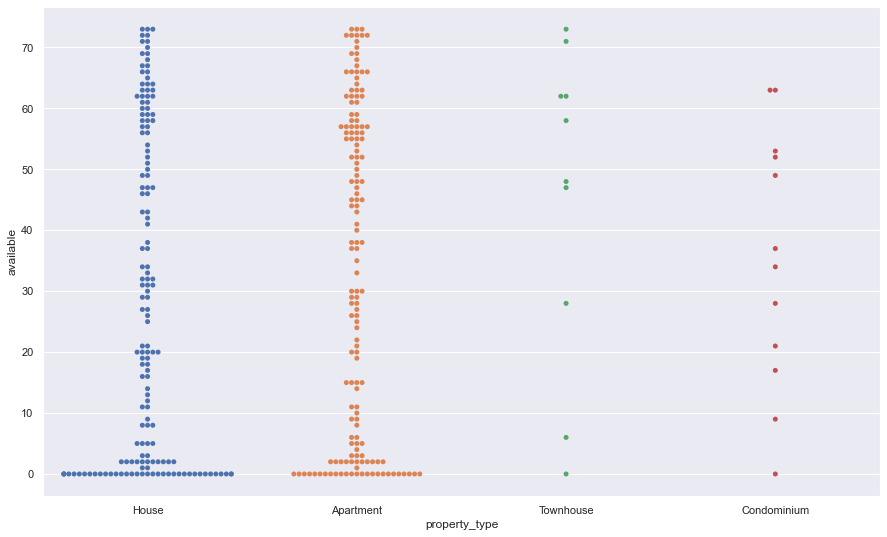

In [66]:
sns.set(rc={'figure.figsize':(15,9)})
sns.swarmplot(x="property_type", y="available", data=ocupacion_minima, size=5)

Se análiza el porcentaje de airbnb's que estan ocupados la mayoría del año.

In [39]:
porcentajes = ((100*ocupacion_minima["property_type"].value_counts())/true_location["property_type"].value_counts()).dropna()
porcentajes

Apartment      12.106538
Condominium    19.047619
House          11.769231
Townhouse      14.084507
Name: property_type, dtype: float64

In [40]:
total = (porcentajes/100 * true_location["property_type"].value_counts()).dropna()
total

Apartment      150.0
Condominium     12.0
House          153.0
Townhouse       10.0
Name: property_type, dtype: float64

Se evidencia que las estructuras más ocupadas a lo largo del año son Condominios y Casas de ciudad, sin embargo, dado que son muy pocas (12 y 10 respectivamente) en comparación a las casas y apartamentos (153 y 150), se concluye que las mejores estructuras son las casas y los apartamentos.

#### Análisis de baños, habitaciones, camas, etc.

Con una tabla pivote se observa la media de ocupación por cantidad de baños, cantidad de habitaciones, y el tipo de estructura.

In [67]:
ocupacion_minima.pivot_table(
      index = 'bathrooms', 
      columns = ["property_type", 'bedrooms'],
      aggfunc = np.mean,
      values = 'available'
)

property_type  Apartment                               Condominium        \
bedrooms             0.0        1.0     2.0   3.0  4.0         1.0   2.0   
bathrooms                                                                  
1.0            37.878788  32.265957  18.700  63.0  0.0   36.555556  48.5   
1.5                  NaN  53.000000  11.000   NaN  NaN         NaN   0.0   
2.0                  NaN        NaN  31.625   NaN  NaN         NaN   NaN   
2.5                  NaN        NaN     NaN   NaN  NaN         NaN   NaN   
3.0                  NaN        NaN     NaN   NaN  NaN         NaN   NaN   
3.5                  NaN        NaN     NaN   NaN  NaN         NaN   NaN   

property_type House                                              Townhouse  \
bedrooms        0.0   1.0        2.0        3.0        4.0   5.0       1.0   
bathrooms                                                                    
1.0            29.6  36.9  31.705882   0.000000        NaN   NaN     63.25   
1.5             NaN  30.0  28.000000   0.000000        NaN   NaN       NaN   
2.0             NaN  16.5  25.125000  15.588235  31.333333   NaN       NaN   
2.5             NaN   NaN  31.500000  31.000000   0.000000   NaN       NaN   
3.0             NaN   NaN        NaN  15.500000   0.000000   NaN       NaN   
3.5             NaN   NaN        NaN        NaN  29.400000  36.0       NaN   

property_type             
bedrooms        2.0  3.0  
bathrooms                 
1.0             NaN  NaN  
1.5            53.0  6.0  
2.0            31.0  NaN  
2.5            28.0  NaN  
3.0             NaN  NaN  
3.5             NaN  NaN

Para evidenciar si son valores atípicos se cuenta cuantos airbnb's corresponden a cada categoría.

In [71]:
ocupacion_minima.pivot_table(
      index = 'bathrooms', 
      columns = ["property_type", 'bedrooms', "room_type"],
      margins = True,
      aggfunc = lambda x: len(x.unique()),
      values = 'available'
)

property_type       Apartment                                           \
bedrooms                  0.0             1.0                            
room_type     Entire home/apt Entire home/apt Private room Shared room   
bathrooms                                                                
1.0                      25.0            36.0         14.0         6.0   
1.5                       NaN             NaN          1.0         NaN   
2.0                       NaN             NaN          NaN         NaN   
2.5                       NaN             NaN          NaN         NaN   
3.0                       NaN             NaN          NaN         NaN   
3.5                       NaN             NaN          NaN         NaN   
All                      25.0            36.0         15.0         6.0   

property_type                                                     Condominium  \
bedrooms                  2.0             3.0             4.0             1.0   
room_type     Entire home/apt Entire home/apt Entire home/apt Entire home/apt   
bathrooms                                                                       
1.0                       6.0             2.0             1.0             9.0   
1.5                       1.0             NaN             NaN             NaN   
2.0                       8.0             NaN             NaN             NaN   
2.5                       NaN             NaN             NaN             NaN   
3.0                       NaN             NaN             NaN             NaN   
3.5                       NaN             NaN             NaN             NaN   
All                      12.0             2.0             1.0             9.0   

property_type                           House                               \
bedrooms                  2.0             0.0             1.0                
room_type     Entire home/apt Entire home/apt Entire home/apt Private room   
bathrooms                                                                    
1.0                       2.0             5.0             6.0         33.0   
1.5                       1.0             NaN             1.0          3.0   
2.0                       NaN             NaN             NaN          3.0   
2.5                       NaN             NaN             NaN          NaN   
3.0                       NaN             NaN             NaN          NaN   
3.5                       NaN             NaN             NaN          NaN   
All                       3.0             5.0             6.0         37.0   

property_type                                                                  \
bedrooms                  2.0             3.0             4.0             5.0   
room_type     Entire home/apt Entire home/apt Entire home/apt Entire home/apt   
bathrooms                                                                       
1.0                      13.0             1.0             NaN             NaN   
1.5                       4.0             1.0             NaN             NaN   
2.0                       7.0            13.0             3.0             NaN   
2.5                       2.0             5.0             1.0             NaN   
3.0                       NaN             2.0             1.0             NaN   
3.5                       NaN             NaN             5.0             2.0   
All                      24.0            16.0             8.0             2.0   

property_type    Townhouse                                 All  
bedrooms               1.0             2.0             3.0      
room_type     Private room Entire home/apt Entire home/apt      
bathrooms                                                       
1.0                    4.0             NaN             NaN  69  
1.5                    NaN             2.0             1.0  13  
2.0                    NaN             2.0             NaN  25  
2.5                    NaN             1.0             NaN   7  
3.0                   

In [43]:
estructuras_eleccion = ocupacion_minima[(ocupacion_minima["property_type"]=="Apartment")|(ocupacion_minima["property_type"]=="House")]

In [44]:
barrios_1 = estructuras_eleccion.pivot_table(
      index = 'neighbourhood', 
      columns = "property_type",
      aggfunc = np.mean,
      values = 'available'
)

In [45]:
barrios_2 = estructuras_eleccion.pivot_table(
      index = 'neighbourhood', 
      columns = "property_type",
      aggfunc = lambda x: len(x.unique()),
      values = 'available'
)

In [46]:
pd.merge(barrios_1, barrios_2, how="inner", on=barrios_1.index, suffixes=('_promedio', '_cantidad')).reindex(columns=["Apartment_promedio", "Apartment_cantidad", "House_promedio", "House_cantidad"]).set_index(barrios_1.index)

property_type,Apartment_promedio,Apartment_cantidad,House_promedio,House_cantidad
neighbourhood,,,,
Alki,0.000000,1.0,66.000000,1.0
Atlantic,17.000000,3.0,50.000000,3.0
Ballard,45.000000,3.0,20.000000,8.0
Belltown,40.058824,14.0,NaN,NaN
Bitter Lake,NaN,NaN,32.666667,2.0
Broadview,66.000000,1.0,37.000000,2.0
Broadway,58.000000,1.0,63.000000,1.0
Bryant,NaN,NaN,0.500000,2.0
Capitol Hill,26.268293,24.0,20.357143,8.0


In [84]:
estructuras_eleccion.pivot_table(
      index = ['accommodates', "guests_included"], 
      columns = ["property_type", "beds"],
      aggfunc = np.mean,
      values = 'available'
)

property_type                 Apartment                             House  \
beds                                1.0        2.0   3.0   4.0        1.0   
accommodates guests_included                                                
1            0                56.000000        NaN   NaN   NaN        NaN   
             1                32.625000        NaN   NaN   NaN  52.800000   
             2                      NaN        NaN   NaN   NaN  62.000000   
2            0                37.250000        NaN   NaN   NaN   0.000000   
             1                28.783784  27.500000   NaN   NaN  31.285714   
             2                33.315789  45.666667   NaN   NaN  24.625000   
             3                      NaN        NaN   NaN   NaN  58.000000   
3            1                37.875000  28.666667   NaN   NaN  52.500000   
             2                40.900000  36.250000   NaN   NaN  10.000000   
             3                 2.600000        NaN   NaN   NaN        NaN   
4            0                      NaN        NaN   NaN   NaN        NaN   
             1                31.000000  32.111111  36.5   NaN        NaN   
             2                 1.000000  57.800000  61.0   NaN  55.500000   
             3                56.000000   0.000000   NaN   NaN        NaN   
             4                      NaN  26.333333   NaN   NaN  14.500000   
             5                      NaN   2.000000   NaN   NaN        NaN   
             6                      NaN        NaN   NaN   NaN        NaN   
5            1                      NaN  51.000000  73.0   NaN        NaN   
             2                      NaN        NaN  58.0   NaN        NaN   
             4                      NaN        NaN   NaN   NaN        NaN   
             5                      NaN        NaN   NaN   NaN        NaN   
             6                      NaN        NaN   NaN   NaN        NaN   
6            1                      NaN  62.000000   NaN   NaN        NaN   
             2                      NaN  30.000000   NaN   NaN        NaN   
             4                      NaN  58.000000  35.0   0.0        NaN   
             5                      NaN        NaN   NaN   NaN        NaN   
             6                      NaN        NaN   NaN   NaN        NaN   
7            1                      NaN        NaN   NaN  62.0        NaN   
             3                      NaN   0.000000   NaN   NaN        NaN   
             4                      NaN        NaN  65.0   NaN        NaN   
             7                      NaN        NaN   NaN   NaN        NaN   
8            1                 5.000000        NaN   NaN   NaN        NaN   
             3                      NaN        NaN   0.0   NaN        NaN   
             4                      NaN        NaN   NaN   NaN        NaN   
             6                      NaN        NaN   NaN   0.0        NaN   
             8                      NaN        NaN   NaN   NaN        NaN   
9            6                      NaN        NaN   NaN   NaN        NaN   
12           1                      NaN        NaN   NaN   NaN        NaN   

property_type                                                        
beds                                2.0        3.0   4.0   5.0  6.0  
accommodates guests_included                                         
1            0                      NaN        NaN   NaN   NaN  NaN  
             1                      NaN        NaN   NaN   NaN  NaN  
             2                      NaN        NaN   NaN   NaN  NaN  
2            0                      NaN        NaN   NaN   NaN  NaN  
             1                34.000000        NaN   NaN   NaN  NaN  
             2                      NaN        NaN   NaN   NaN  NaN  
             3                      NaN        NaN   NaN   NaN  NaN  
3            1                38.333333        NaN   NaN   NaN  NaN  
             2                64.000000        NaN   NaN   NaN  NaN  
  

In [93]:
eleccion = estructuras_eleccion[(estructuras_eleccion["property_type"]=="House")&(estructuras_eleccion["bathrooms"]==2)&(estructuras_eleccion["bedrooms"]==3)|
                               (estructuras_eleccion["property_type"]=="Apartment")&(estructuras_eleccion["bathrooms"]==1)&(estructuras_eleccion["bedrooms"]==1)]

In [92]:
eleccion.pivot_table(
      index = 'accommodates', 
      columns = ["guests_included", "beds"],
      aggfunc = np.mean,
      values = 'available'
)

guests_included     0          1                         2                  \
beds              1.0        1.0        2.0   3.0      1.0        2.0  3.0   
accommodates                                                                 
1                56.0  32.625000        NaN   NaN      NaN        NaN  NaN   
2                 1.0  23.350000        NaN   NaN  32.6875  33.000000  NaN   
3                 NaN  42.571429  43.000000   NaN  43.5000  46.333333  NaN   
4                 NaN  31.000000  38.714286  28.0   1.0000  54.000000  NaN   
5                 NaN        NaN  51.000000  18.0      NaN        NaN  NaN   
6                 NaN        NaN  46.000000  14.0      NaN        NaN  0.0   
8                 NaN        NaN        NaN   NaN      NaN        NaN  NaN   

guests_included          3          4     5     6                     8  
beds             4.0   1.0  2.0   2.0   3.0   2.0  3.0  4.0   5.0   3.0  
accommodates                                                             
1                NaN   NaN  NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  
2                NaN   NaN  NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  
3                NaN   0.5  NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  
4                NaN  56.0  0.0  32.0   NaN   NaN  NaN  NaN   NaN   NaN  
5                8.0   NaN  NaN   NaN  23.5   NaN  NaN  NaN   NaN   NaN  
6                NaN   NaN  NaN   NaN   NaN   NaN  0.0  9.5   NaN   NaN  
8                NaN   NaN  NaN   NaN   NaN  27.0  NaN  NaN  34.0  10.5

In [94]:
eleccion.pivot_table(
      index = 'accommodates', 
      columns = ["guests_included", "beds"],
      aggfunc = lambda x: len(x.unique()),
      values = 'available'
)

guests_included    0     1               2                   3         4    5  \
beds             1.0   1.0  2.0  3.0   1.0  2.0  3.0  4.0  1.0  2.0  2.0  3.0   
accommodates                                                                    
1                1.0   8.0  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2                1.0  15.0  NaN  NaN  13.0  2.0  NaN  NaN  NaN  NaN  NaN  NaN   
3                NaN   6.0  2.0  NaN   7.0  3.0  NaN  NaN  2.0  NaN  NaN  NaN   
4                NaN   5.0  7.0  1.0   2.0  3.0  NaN  NaN  1.0  1.0  2.0  NaN   
5                NaN   NaN  1.0  1.0   NaN  NaN  NaN  1.0  NaN  NaN  NaN  2.0   
6                NaN   NaN  1.0  2.0   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN   
8                NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

guests_included    6                   8  
beds             2.0  3.0  4.0  5.0  3.0  
accommodates                              
1                NaN  NaN  NaN  NaN  NaN  
2                NaN  NaN  NaN  NaN  NaN  
3                NaN  NaN  NaN  NaN  NaN  
4                NaN  NaN  NaN  NaN  NaN  
5                NaN  NaN  NaN  NaN  NaN  
6                NaN  1.0  2.0  NaN  NaN  
8                1.0  NaN  NaN  1.0  2.0

## Precio

In [50]:
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [51]:
calendario_precio = listado_copia.copy()
calendario_precio = calendario_precio.drop(columns=["price", "available", "is_location_exact"])
calendario = calendario.rename({'listing_id': 'id'}, axis=1)
calendario.head()

,id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [52]:
calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate
1,953595,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,$0.00,2,10.0,strict
2,3308979,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,10,$25.00,4,10.0,strict
3,7421966,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,$0.00,1,NaN,flexible
4,278830,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,6,$15.00,1,9.0,strict


In [53]:
calendario_precio =  pd.merge(calendario_precio, calendario, how="inner", on=["id"])
calendario_precio = calendario_precio.dropna()
calendario_precio = calendario_precio.drop(columns="available")
calendario_precio["day_week"] = pd.DatetimeIndex(calendario_precio["date"]).dayofweek
calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-04,85.0,1,0
1,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-05,85.0,1,1
9,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-13,85.0,1,2
10,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-14,85.0,1,3
14,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-18,85.0,1,0


In [54]:
otras_estrucutras = ["Bungalow", "Boat", "Tent", "Camper/RV", "Loft", "Other", "Dorm", "Bed & Breakfast", "Chalet", "Treehouse", "Cabin"]
for i in otras_estrucutras:
    calendario_precio = calendario_precio[calendario_precio["property_type"]!=i]

In [55]:
fig = px.box(calendario_precio[calendario_precio["date"]=="2016-07-23"], y="price", color="property_type")
fig.show()

In [56]:
calendario_precio[calendario_precio["property_type"]=="Apartment"] = calendario_precio[(calendario_precio["property_type"]=="Apartment")&(calendario_precio["price"]<=339)]
calendario_precio[calendario_precio["property_type"]=="House"] = calendario_precio[(calendario_precio["property_type"]=="House")&(calendario_precio["price"]<=330)]
calendario_precio[calendario_precio["property_type"]=="Townhouse"] = calendario_precio[(calendario_precio["property_type"]=="Townhouse")&(calendario_precio["price"]<=300)]
calendario_precio[calendario_precio["property_type"]=="Condominium"] = calendario_precio[(calendario_precio["property_type"]=="Condominium")&(calendario_precio["price"]<=350)]
calendario_precio = calendario_precio[calendario_precio["price"]!=10]
calendario_precio = calendario_precio[calendario_precio["bathrooms"]!=5]
calendario_precio = calendario_precio[calendario_precio["accommodates"]!=16]
calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
0,241032.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,$5.00,1.0,9.0,moderate,2016-01-04,85.0,1.0,0.0
1,241032.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,$5.00,1.0,9.0,moderate,2016-01-05,85.0,1.0,1.0
9,241032.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,$5.00,1.0,9.0,moderate,2016-01-13,85.0,1.0,2.0
10,241032.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,$5.00,1.0,9.0,moderate,2016-01-14,85.0,1.0,3.0
14,241032.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,2.0,$5.00,1.0,9.0,moderate,2016-01-18,85.0,1.0,0.0


In [57]:
fig = px.box(calendario_precio[calendario_precio["date"]=="2016-07-23"], y="price", color="property_type")
fig.show()

In [58]:
calendario_precio["room_type"].unique()

array(['Entire home/apt', nan, 'Private room', 'Shared room'],
      dtype=object)

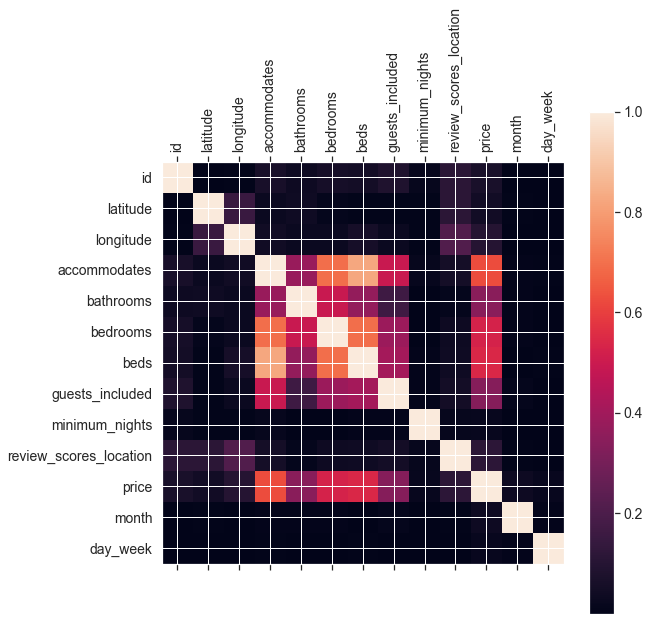

In [59]:
plt.matshow(abs(calendario_precio.corr()))
plt.xticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [95]:
fechas = calendario_precio["date"].dropna().unique()
dates_regresion = pd.DataFrame(columns=["date", "rsquared", "resultado"])
txt_params = ["Capitol Hill",
         "Apartment",
         "Entire home/apt",
         "Real Bed"]
num_params = [2, 1, 1, 1, 1] #Accommodates, Bathrooms, Bedrooms, Beds, GuestsIncluded
for i in calendario_precio["date"].dropna().unique():
    model = sm.OLS.from_formula("price ~ accommodates + bathrooms + bedrooms + beds + room_type + property_type + neighbourhood + bed_type + guests_included",
                                data=calendario_precio[calendario_precio["date"]==i])
    result = model.fit()
    
    parametros = pd.DataFrame(result.params)
    

    parametros["params"] = 0
    for k in txt_params:
        for j in parametros.index.to_list():
            if k in j:
                parametros.loc[j, "params"]=1 

    parametros.loc["Intercept", "params"] = 1
    parametros.loc["accommodates", "params"] = num_params[0]
    parametros.loc["bathrooms", "params"] = num_params[1]
    parametros.loc["bedrooms", "params"] = num_params[2]
    parametros.loc["beds", "params"] = num_params[3]
    parametros.loc["guests_included", "params"] = num_params[4]
    dates_regresion = dates_regresion.append({'date': i, "rsquared":result.rsquared, "resultado":(parametros[0]*parametros["params"]).sum()}, ignore_index=True)

In [96]:
dates_regresion = dates_regresion.sort_values(by=['date']).reset_index(drop=True)
dates_regresion.head()

,date,rsquared,resultado
0,2016-01-04,0.600777,119.517089
1,2016-01-05,0.610767,125.993725
2,2016-01-06,0.626093,126.550228
3,2016-01-07,0.629447,127.857825
4,2016-01-08,0.629761,139.174902


In [97]:
fig = dates_regresion.plot("date","resultado")
fig.show()

In [34]:
def relación_alta_significativa(var_a, var_b, df, min_mag = 0.5, confianza = 0.95):
    corr, pvalor = stats.pearsonr(df[var_a], df[var_b])
    es_alta_significativa = abs(corr)>=min_mag and pvalor<=1-confianza
    return es_alta_significativa, abs(corr), pvalor

In [49]:
def correlacion_pearson_con_significancia(x, y, df, alfa=0.05):
    coef, p = stats.pearsonr(df[x], df[y])
    if p > alfa:
        return False, abs(p)
    else:
        return True, abs(p)

In [51]:
def correlacion_spearmanr_con_significancia(a, b, df):
    coef, p = stats.spearmanr(df[a], df[b])
    if p > 0.05:
        return False, abs(p)
    else:
        return True, abs(p)

In [53]:
def correlacion_kendal_con_significancia(a, b, df):
    coef, p = stats.kendalltau(df[a], df[b])
    if p > 0.05/2.0:
          return False, abs(p)
    else:
          return True, abs(p)